#K-NEAREST NEIGHBOURS

Loading the dataset

In [1]:
import pandas as pd
df=pd.read_csv("/content/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Performing EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Axes: xlabel='animal name'>

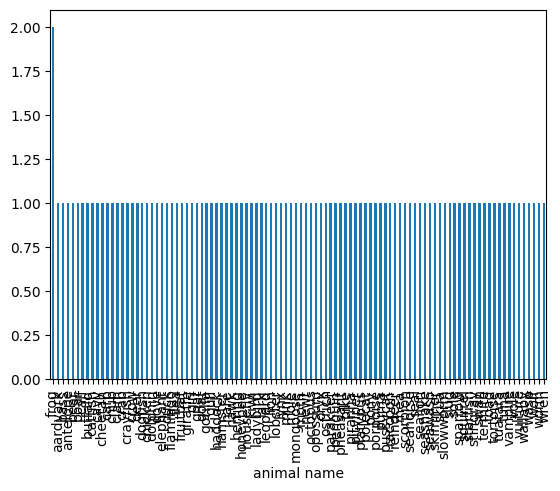

In [3]:
#bar graph
df['animal name'].value_counts().plot(kind='bar')

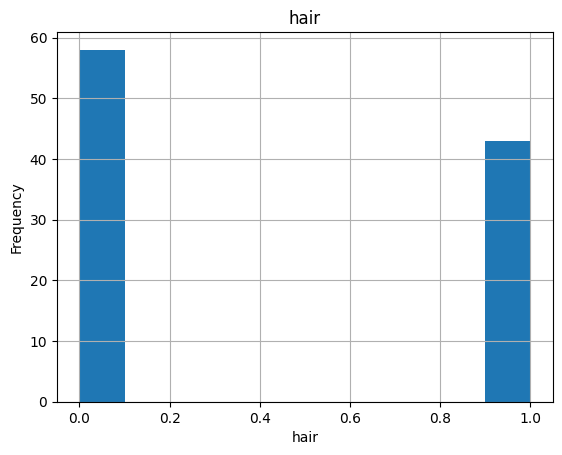

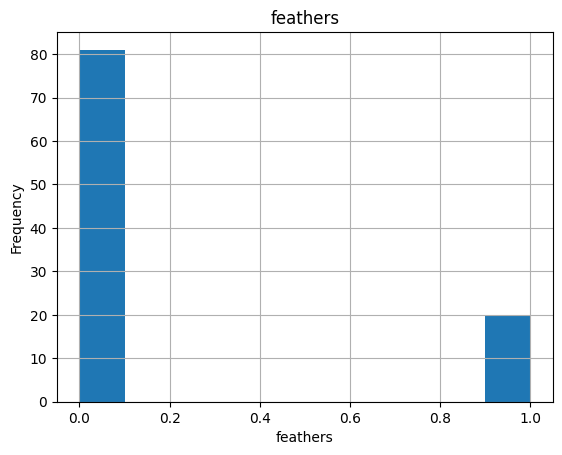

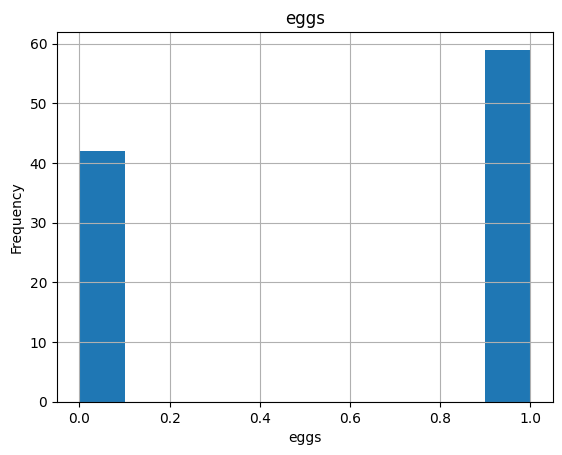

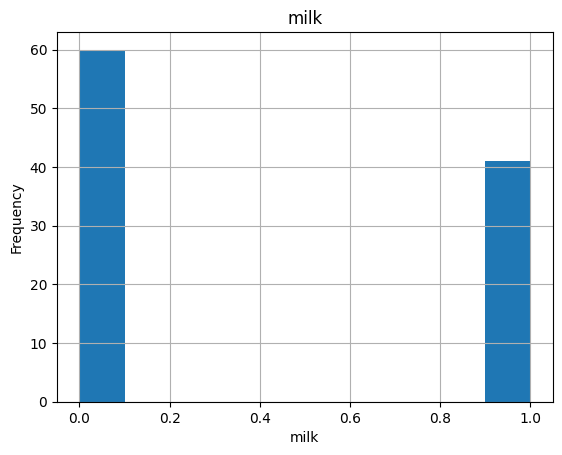

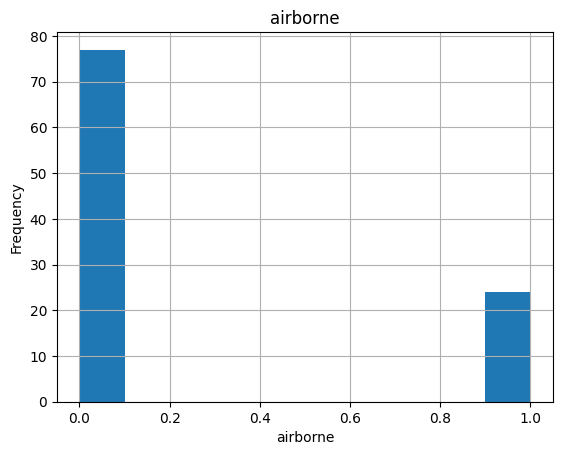

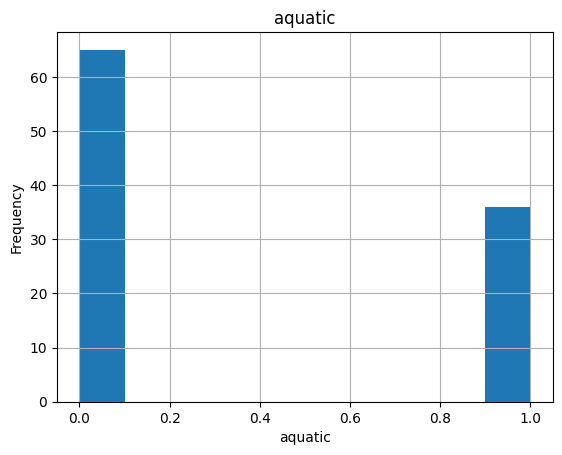

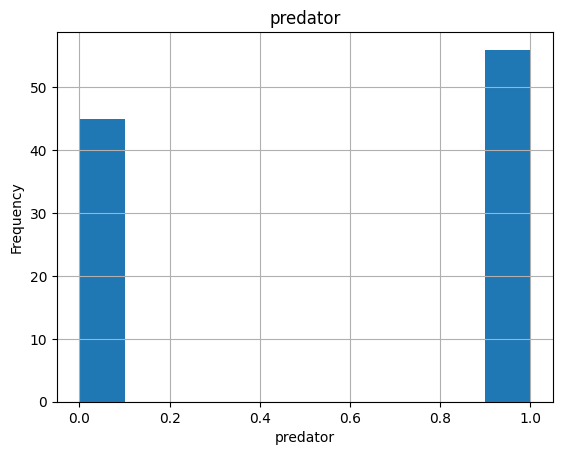

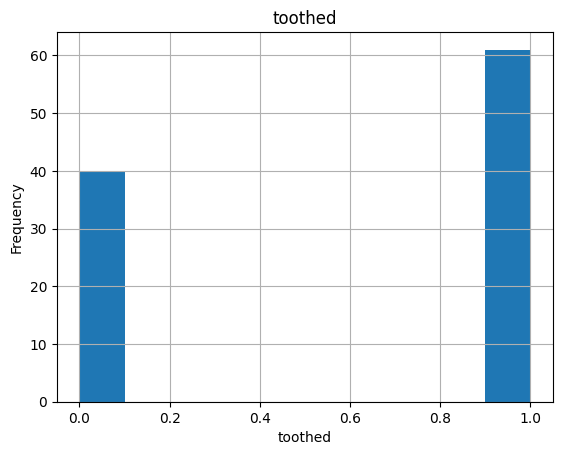

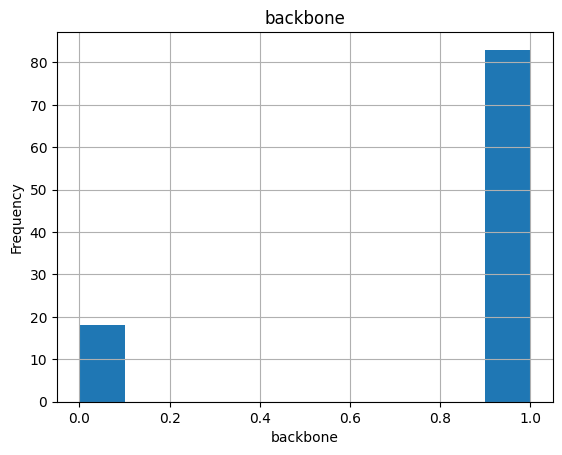

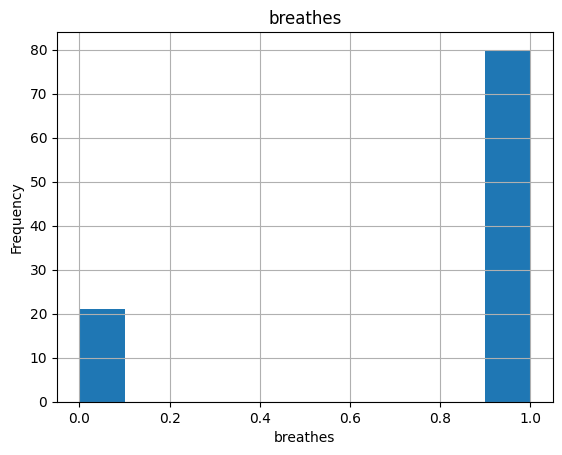

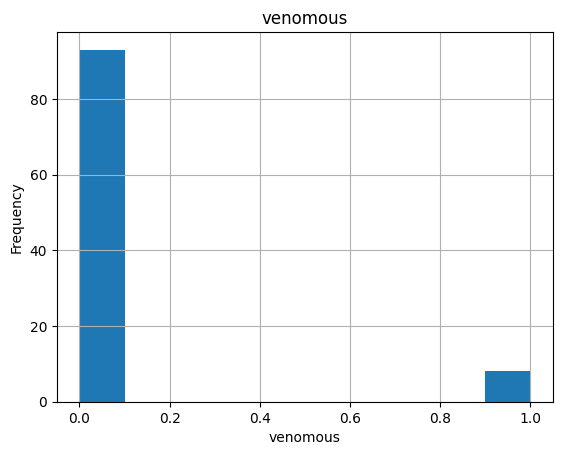

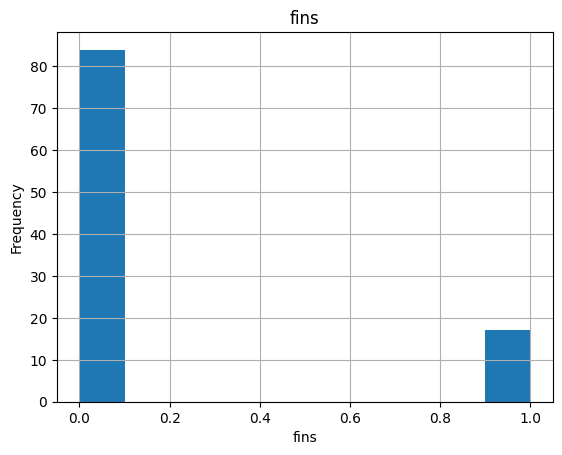

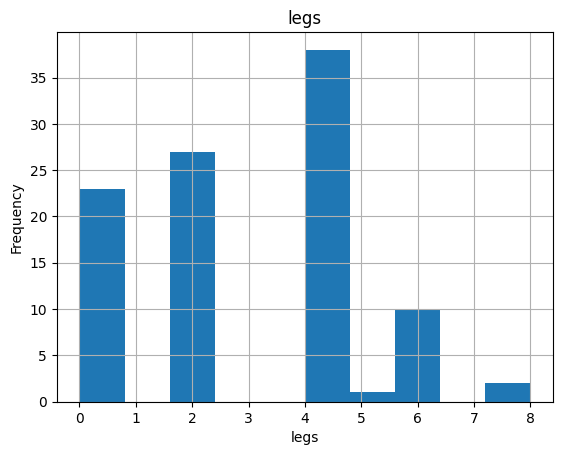

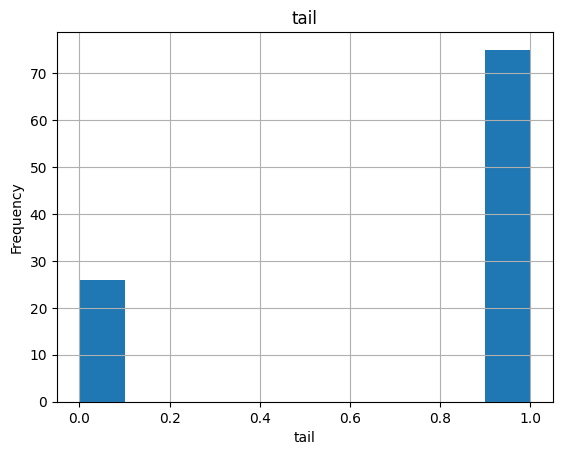

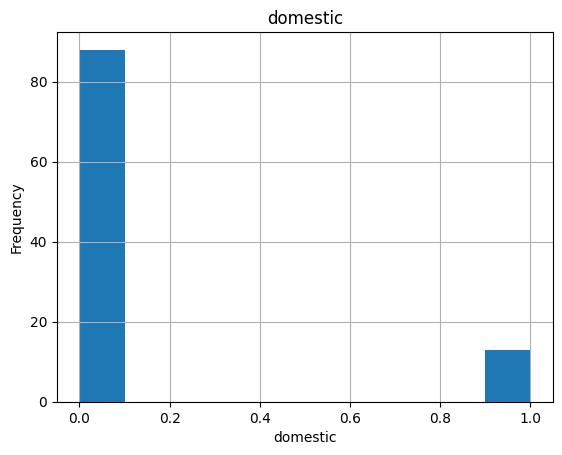

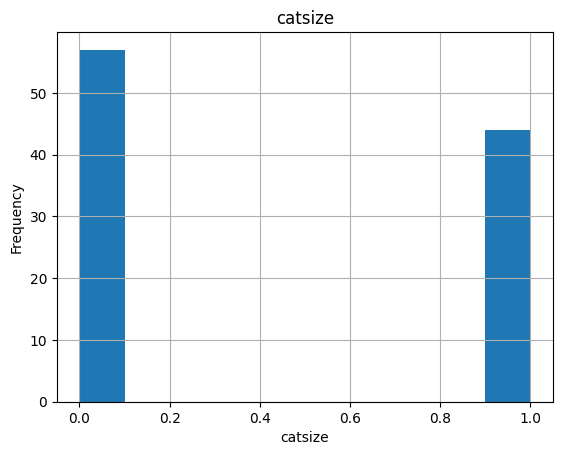

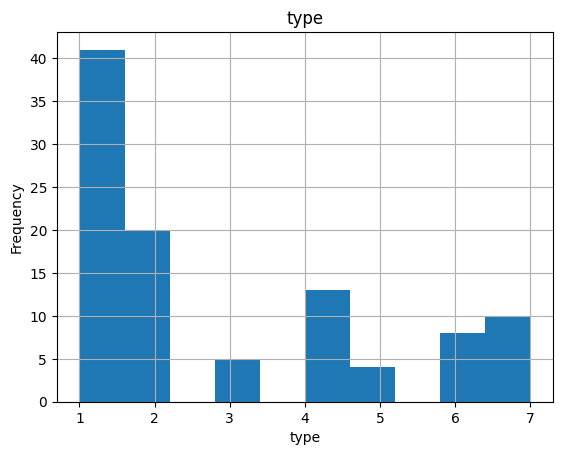

In [4]:
#histogram
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
  df[col].hist()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

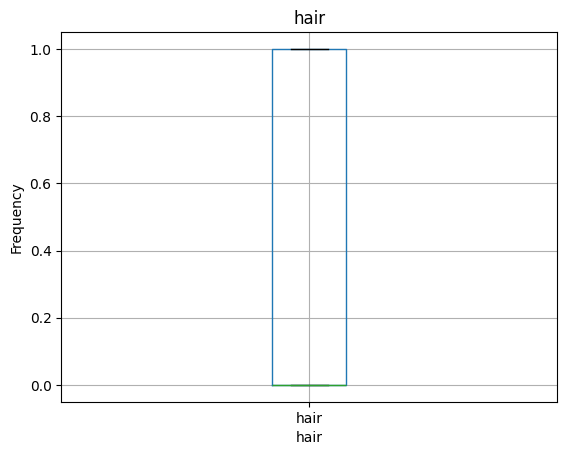

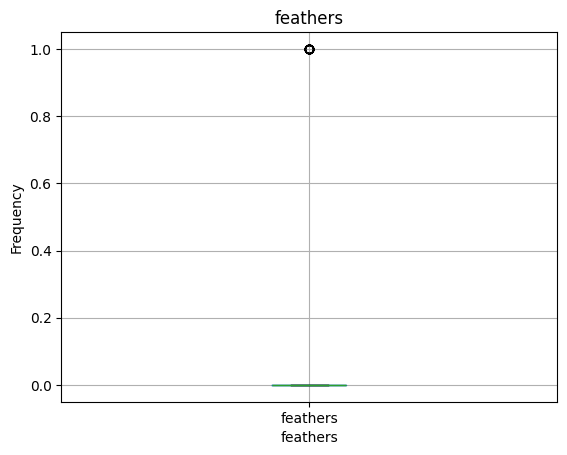

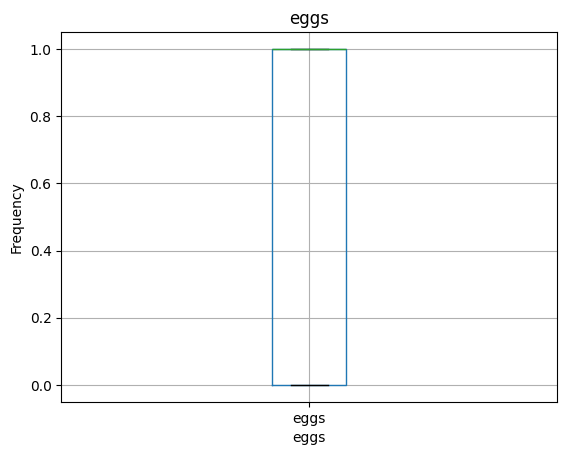

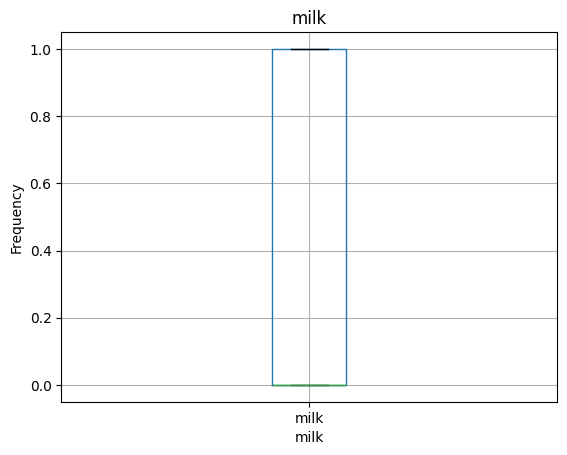

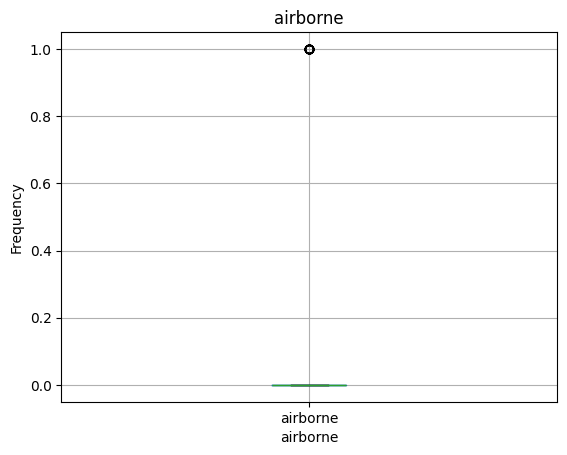

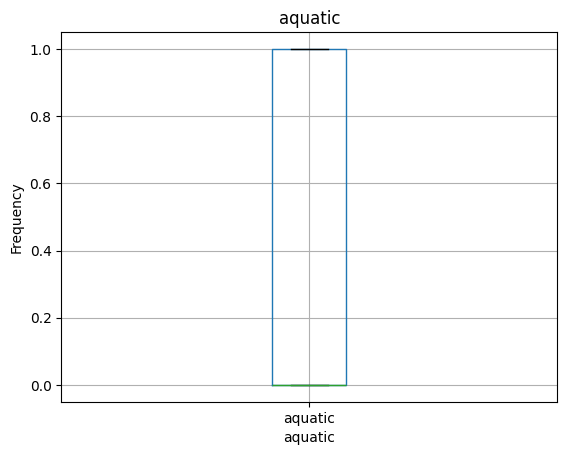

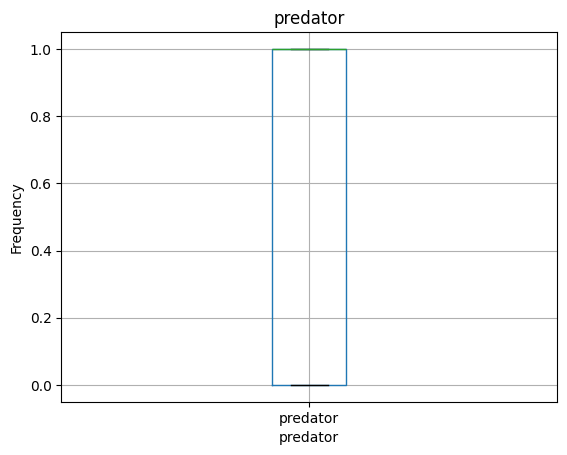

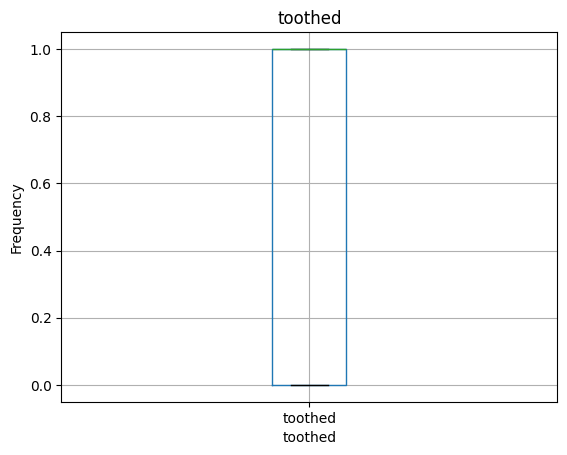

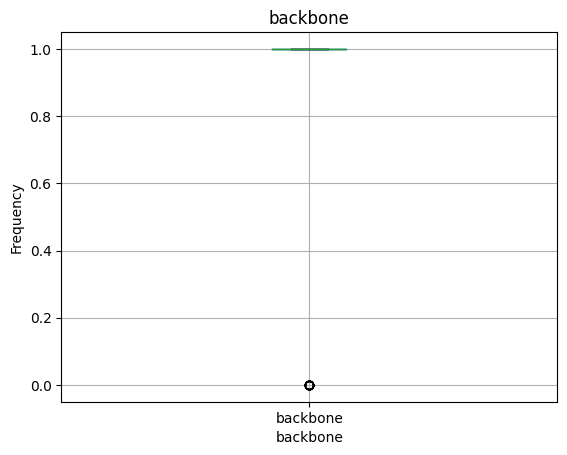

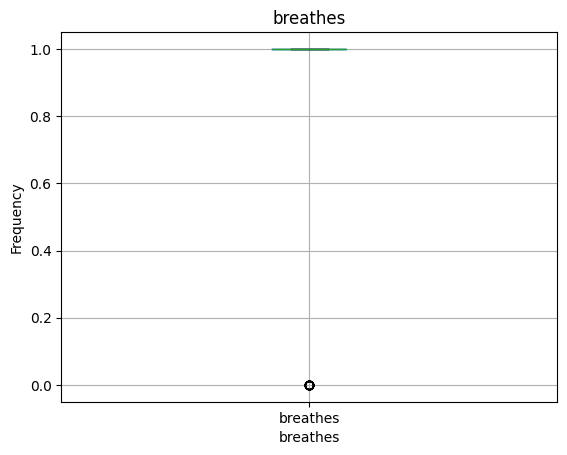

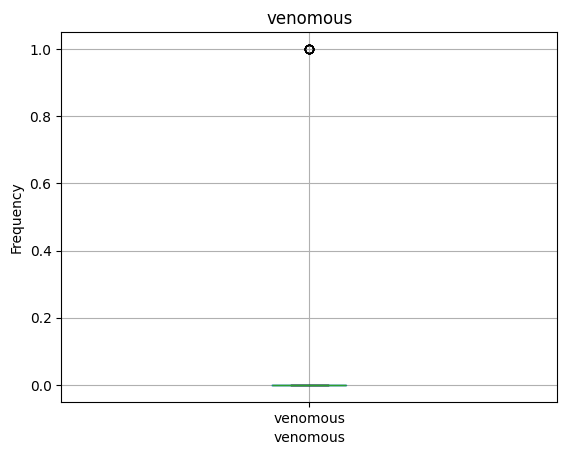

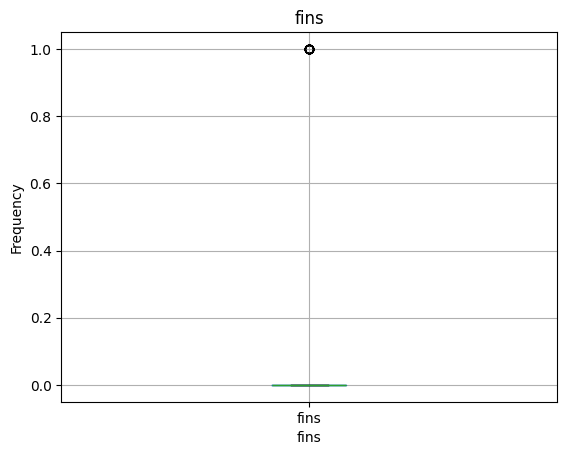

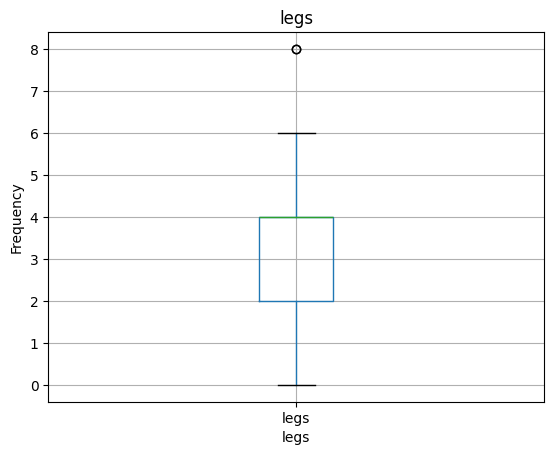

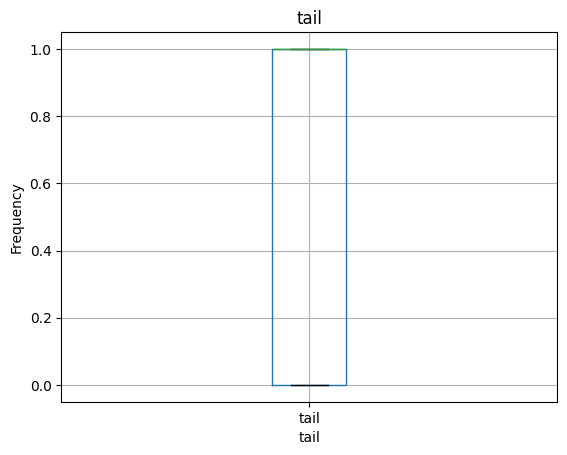

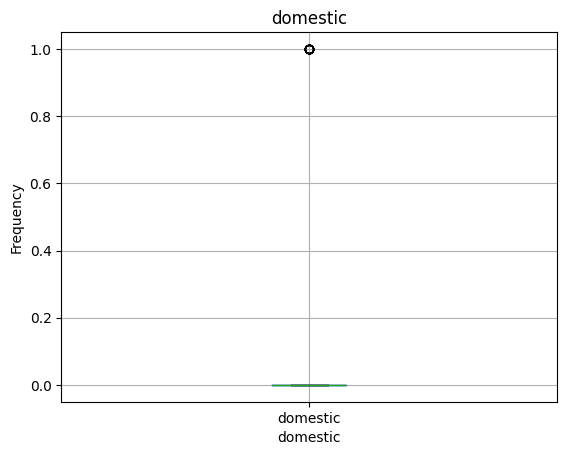

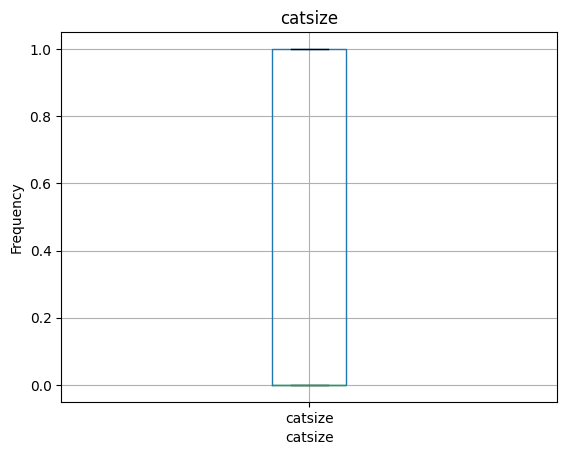

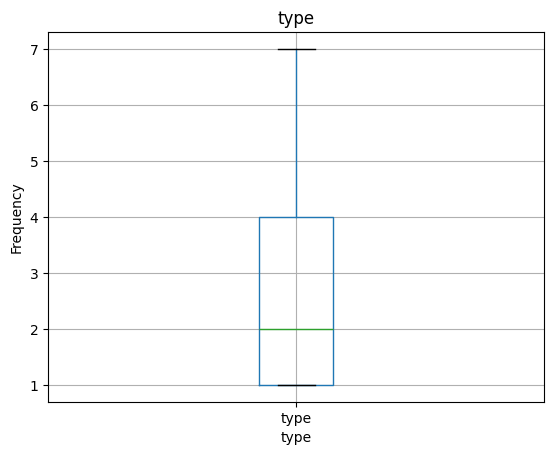

In [5]:
#box plots
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
  df.boxplot(column=col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

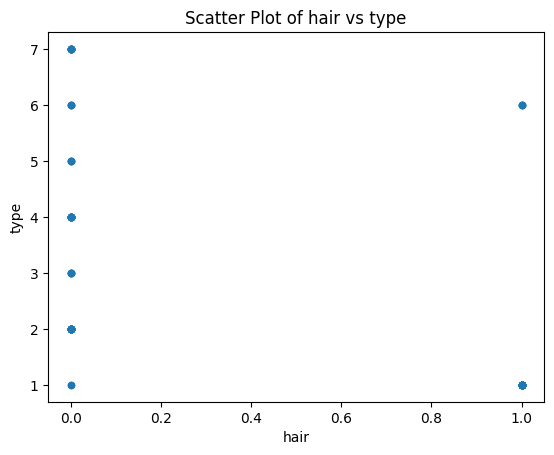

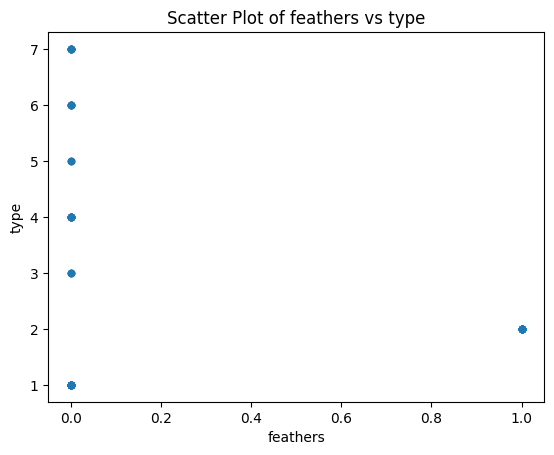

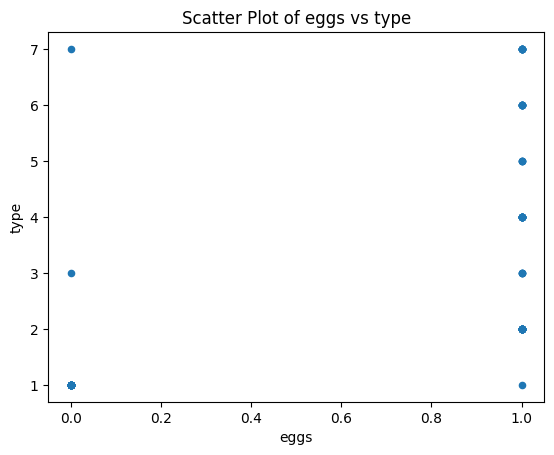

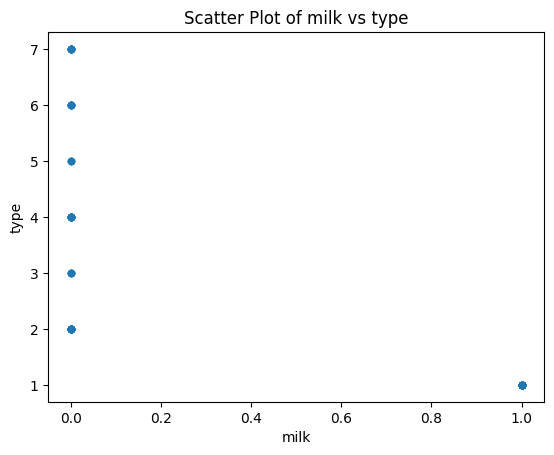

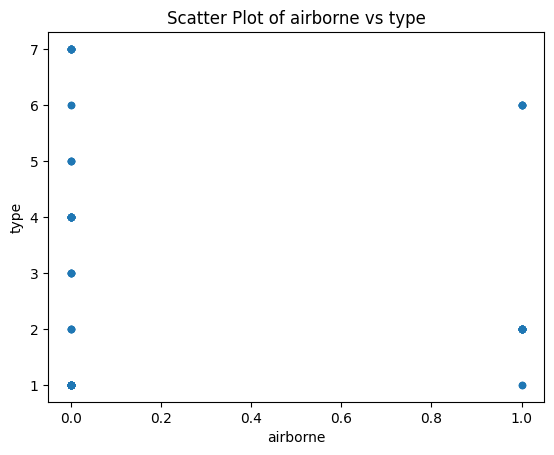

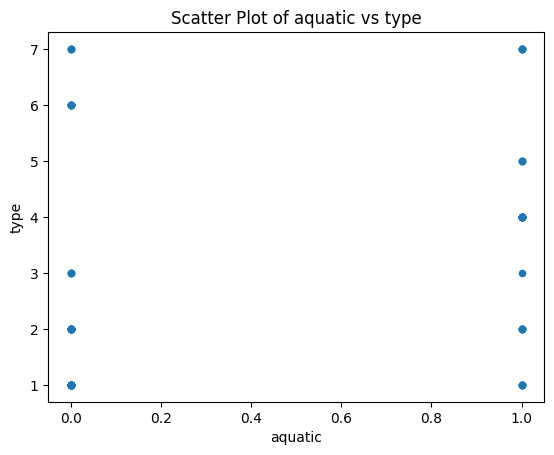

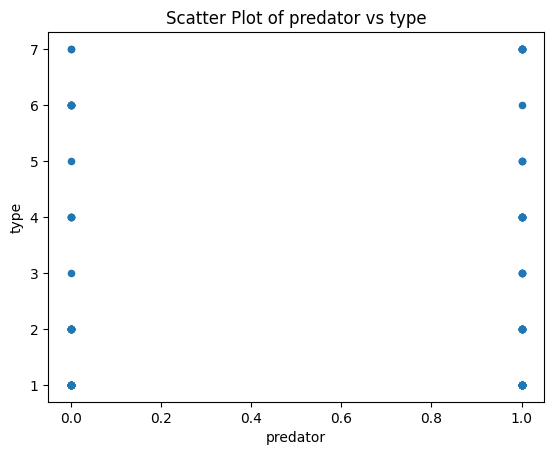

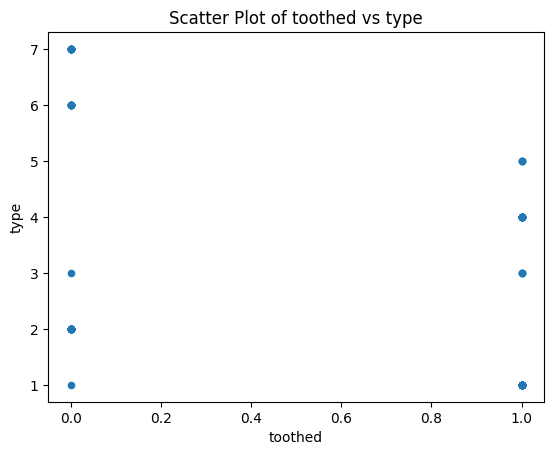

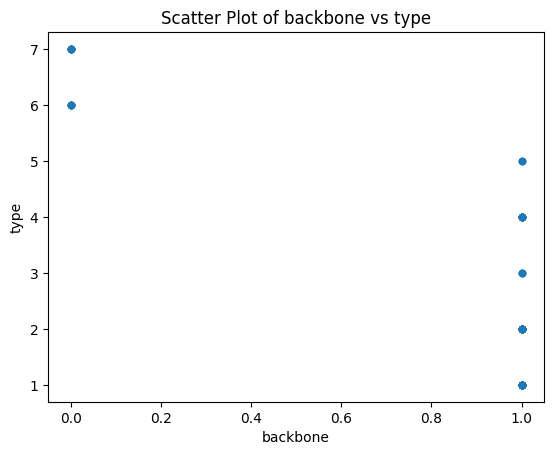

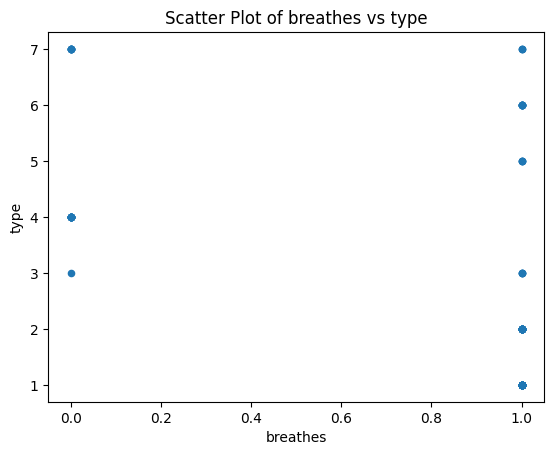

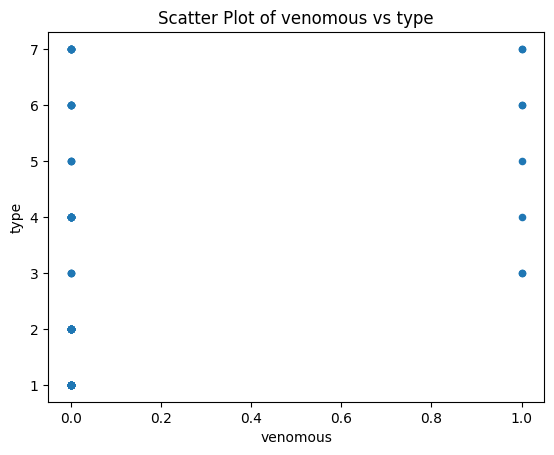

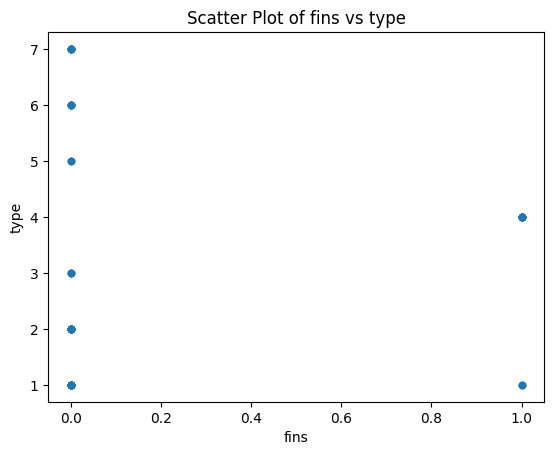

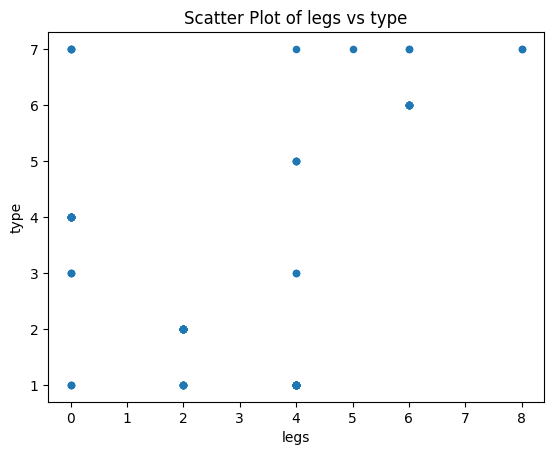

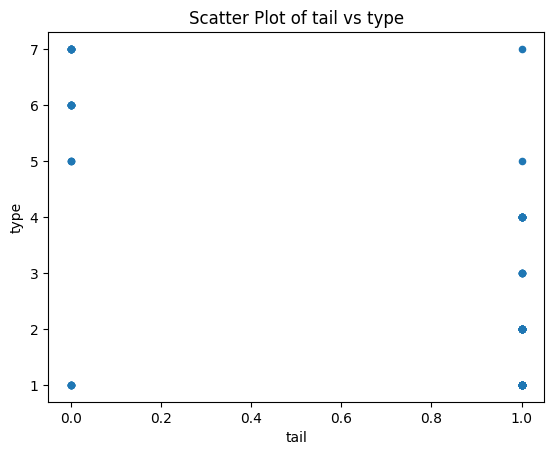

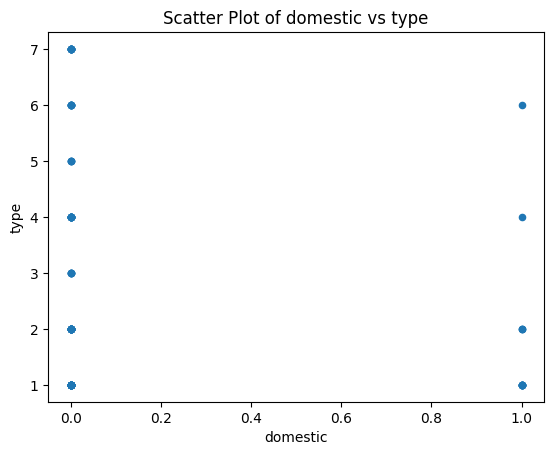

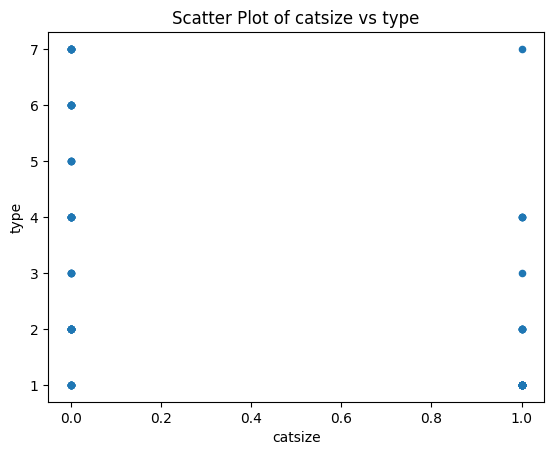

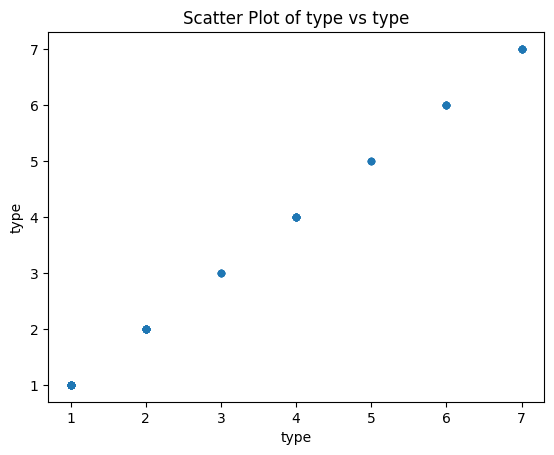

In [6]:
#scatter plots
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    df.plot(kind='scatter',y='type',x=col)
    plt.title(f'Scatter Plot of {col} vs type')
    plt.show()

Data Preprocessing

In [7]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [8]:
df.shape

(101, 18)

Data Transformation

In [9]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['animal name']=le.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Data Partition

In [10]:
#define features and target variable
X=df.drop('type',axis=1)
Y=df['type']

In [11]:
#data partion
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Implementing KNN

In [12]:
#model fitting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
#predicting the values
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
import numpy as np
#accuracy score
training_score = accuracy_score(y_train,y_pred_train)
print("Training Accuracy score: ", np.round(training_score,2))

test_score = accuracy_score(y_test,y_pred_test)
print("Test Accuracy score: ", np.round(test_score,2))

Training Accuracy score:  0.55
Test Accuracy score:  0.43


In [16]:
#precision score
training_p_score=precision_score(y_train,y_pred_train,average='weighted')
print("Training Precision score: ", np.round(training_p_score,2))

test_p_score=precision_score(y_test,y_pred_test,average='weighted')
print("Test Precision score: ", np.round(test_p_score,2))

Training Precision score:  0.48
Test Precision score:  0.32


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
#recall score
training_r_score=recall_score(y_train,y_pred_train,average='weighted')
print("Training Recall score: ", np.round(training_r_score,2))

test_r_score=recall_score(y_test,y_pred_test,average='weighted')
print("Test Recall score: ", np.round(test_r_score,2))

Training Recall score:  0.55
Test Recall score:  0.43


In [18]:
#f1 score
training_f1_score=f1_score(y_train,y_pred_train,average='weighted')
print("Training F1 score: ", np.round(training_f1_score,2))

test_f1_score=f1_score(y_test,y_pred_test,average='weighted')
print("Test F1 score: ", np.round(test_f1_score,2))

Training F1 score:  0.46
Test F1 score:  0.37


Cross Validation

In [19]:
#shuffle split cross validation
model = KNeighborsClassifier(n_neighbors=5)

# Set up ShuffleSplit cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=100, test_size=0.3)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: test accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))

cross validation: test accuracy: 0.55
cross validation: test accuracy: 0.4


In [20]:
#trying with different k values
k_training_score=[]
k_test_score=[]

for i in range(5,19,2):
    model = KNeighborsClassifier(n_neighbors=i)
    shuffle_split = ShuffleSplit(n_splits=100, test_size=0.3)
    cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)
    train_scores = cv_results['train_score']
    test_scores = cv_results['test_score']
    k_training_score.append(np.round(train_scores.mean(),2))
    k_test_score.append(np.round(test_scores.mean(),2))

print("Training scores:",k_training_score)
print("Test scores:",k_test_score)

Training scores: [np.float64(0.55), np.float64(0.52), np.float64(0.46), np.float64(0.43), np.float64(0.43), np.float64(0.42), np.float64(0.41)]
Test scores: [np.float64(0.4), np.float64(0.39), np.float64(0.36), np.float64(0.37), np.float64(0.37), np.float64(0.35), np.float64(0.36)]


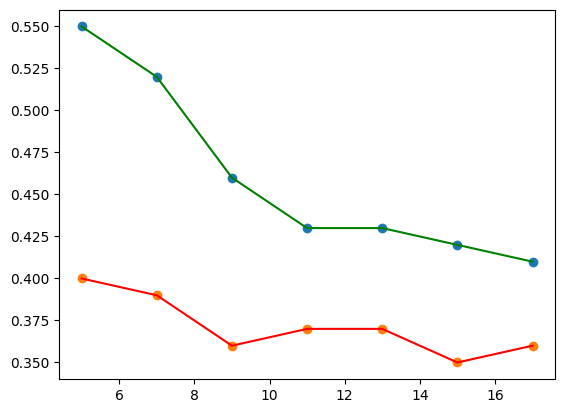

In [21]:
#scatter plot for training scores vs test scores
import matplotlib.pyplot as plt
plt.scatter(range(5,19,2),k_training_score)
plt.plot(range(5,19,2),k_training_score,color='green')
plt.scatter(range(5,19,2),k_test_score)
plt.plot(range(5,19,2),k_test_score,color='red')
plt.show()

PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [23]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca,Y)

KNeighborsClassifier()

In [25]:
accuracy_score(Y,knn.predict(X_pca))
print("Accuracy score: ", np.round(accuracy_score(Y,knn.predict(X_pca)),2))

Accuracy score:  0.51


Visualizing the boundaries of the classifier

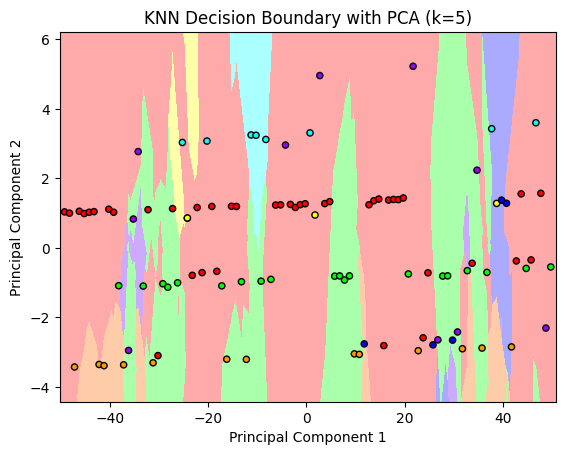

In [26]:
# Plotting the decision boundary
from matplotlib.colors import ListedColormap

# Create color maps for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFCCAA', '#FFFFAA', '#AAFFFF', '#CCAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF9900', '#FFFF00', '#00FFFF', '#9900FF'])

# Determine the mesh grid extent
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundary with PCA (k=5)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Answers for interview questions:

1. The key hyperparameters in KNN are n_neigbors,weight and metrics

2. The distance metrics that can be used in KNN is the "Eucledian Distance."